In [1]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from  sklearn.metrics import accuracy_score
from  sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)


This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "Probability of Parkinsons".

Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

Attribute Information:

Matrix column entries (attributes):
name-ASCII subject name and recording number
MDVP:Fo(Hz)-Average vocal fundamental frequency
MDVP:Fhi(Hz)-Maximum vocal fundamental frequency
MDVP:Flo(Hz)-Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR-Two measures of ratio of noise to tonal components in the voice
status-Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2-Two nonlinear dynamical complexity measures
DFA-Signal fractal scaling exponent
spread1,spread2,Probability of Parkinsons

### Step 2: Reading in the data from the .csv file.

In [2]:
dataset = pd.read_csv('parkinsons.data')

In [3]:
#check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       195 non-null    object 
 1   MDVP:Fo(Hz)                195 non-null    float64
 2   MDVP:Fhi(Hz)               195 non-null    float64
 3   MDVP:Flo(Hz)               195 non-null    float64
 4   MDVP:Jitter(%)             195 non-null    float64
 5   MDVP:Jitter(Abs)           195 non-null    float64
 6   MDVP:RAP                   195 non-null    float64
 7   MDVP:PPQ                   195 non-null    float64
 8   Jitter:DDP                 195 non-null    float64
 9   MDVP:Shimmer               195 non-null    float64
 10  MDVP:Shimmer(dB)           195 non-null    float64
 11  Shimmer:APQ3               195 non-null    float64
 12  Shimmer:APQ5               195 non-null    float64
 13  MDVP:APQ                   195 non-null    float64

In [4]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,Probability of Parkinsons
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
Xvalue = dataset.iloc[:,2:23]  #removing first column and taking the remaining data
Yvalue = dataset.iloc[:,23]  #taking the last column, feature to be predicted

print('feature data: \n', Xvalue )
print('target data: \n', Yvalue)

feature data: 
      MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
0         157.302        74.997         0.00784           0.00007   0.00370   
1         148.650       113.819         0.00968           0.00008   0.00465   
2         131.111       111.555         0.01050           0.00009   0.00544   
3         137.871       111.366         0.00997           0.00009   0.00502   
4         141.781       110.655         0.01284           0.00011   0.00655   
..            ...           ...             ...               ...       ...   
190       230.978        94.261         0.00459           0.00003   0.00263   
191       253.017        89.488         0.00564           0.00003   0.00331   
192       240.005        74.287         0.01360           0.00008   0.00624   
193       396.961        74.904         0.00740           0.00004   0.00370   
194       260.277        77.973         0.00567           0.00003   0.00295   

     MDVP:PPQ  Jitter:DDP  MDVP:Shi

### Inverting the target column data to classification

In [6]:
Y = list()
threshold = .5
for i in Yvalue:
    if i < threshold:
        i = 0
        Y.append(i)
    else:
        i = 1
        Y.append(i)
Y = np.array(Y)
Y = Y.reshape(Xvalue.shape[0],1)

### Initializing a MinMaxScaler and scale the features to between 0 and 1 to normalize them.
The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
Xs = min_max_scaler.fit_transform(Xvalue)
Y = min_max_scaler.fit_transform(Y)
print("features scaled: \n", Xs)

features scaled: 
 [[0.11259173 0.05481479 0.1956798  ... 0.56987521 0.58576513 0.39066128]
 [0.09493044 0.2783228  0.25412961 ... 0.70327699 0.74133704 0.47314522]
 [0.05912816 0.26528838 0.28017789 ... 0.6367447  0.68637091 0.40881938]
 ...
 [0.28141298 0.05072714 0.37865311 ... 0.21294468 0.34257652 0.55896743]
 [0.60180655 0.05427936 0.18170267 ... 0.2206504  0.45288473 0.31822198]
 [0.32279413 0.07194837 0.12674714 ... 0.40516128 0.41509481 0.50367281]]


### Now, splitting the dataset into training and testing sets keeping 20% of the data for testing.

In [8]:
# Splitting training and testing and randomizing
X_train,X_test,Y_train,Y_test=train_test_split(Xs, Y, test_size=0.2, random_state=7)

print("Shape of training data: ",X_train.shape)
print("Shape of training features: ",Y_train.shape)
print("Shape of testing data: ",X_test.shape)
print("Shape of testing features: ",Y_test.shape)

Shape of training data:  (156, 21)
Shape of training features:  (156, 1)
Shape of testing data:  (39, 21)
Shape of testing features:  (39, 1)


### Gaussian Normal Distribution Visualization:

Gaussian distribution (also known as normal distribution) is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.
This Bell curve shows the normal distribution. i am going to check whether features column are normally distributed or not, If not then we normalize them with different methods Like <font color=blue>Log Transformation</font> , <font color=red>Reciprocal Transformation</font>,<font color=green>square root transformation </font> ,etc.

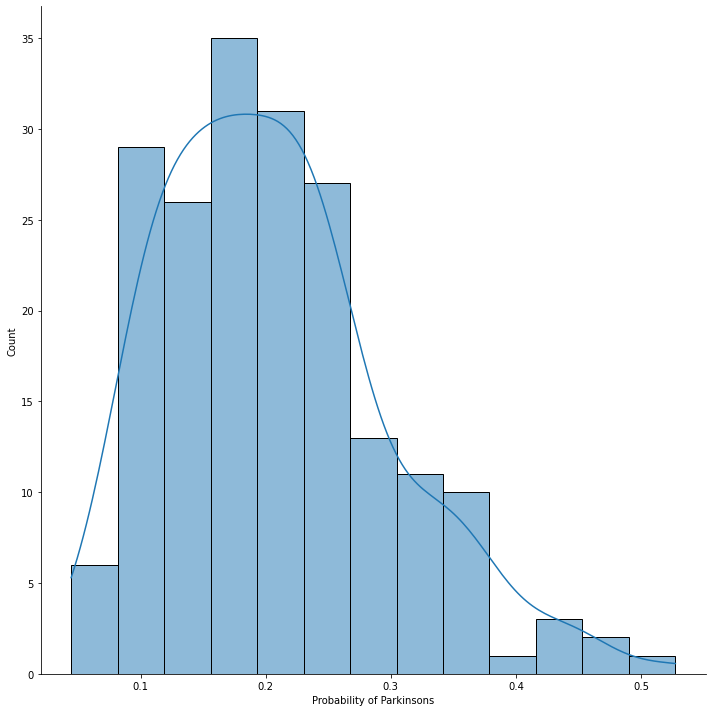

In [9]:
sns.displot(dataset, x=dataset['Probability of Parkinsons'], shrink=1, height= 10, kde=True)

### Correlation test is used to evaluate the association between two or more variables. For instance, if we are interested to know whether there is a relationship between the heights of fathers and sons, a correlation coefficient can be calculated to answer this question. For this investigation i will use the heatmap

<AxesSubplot:>

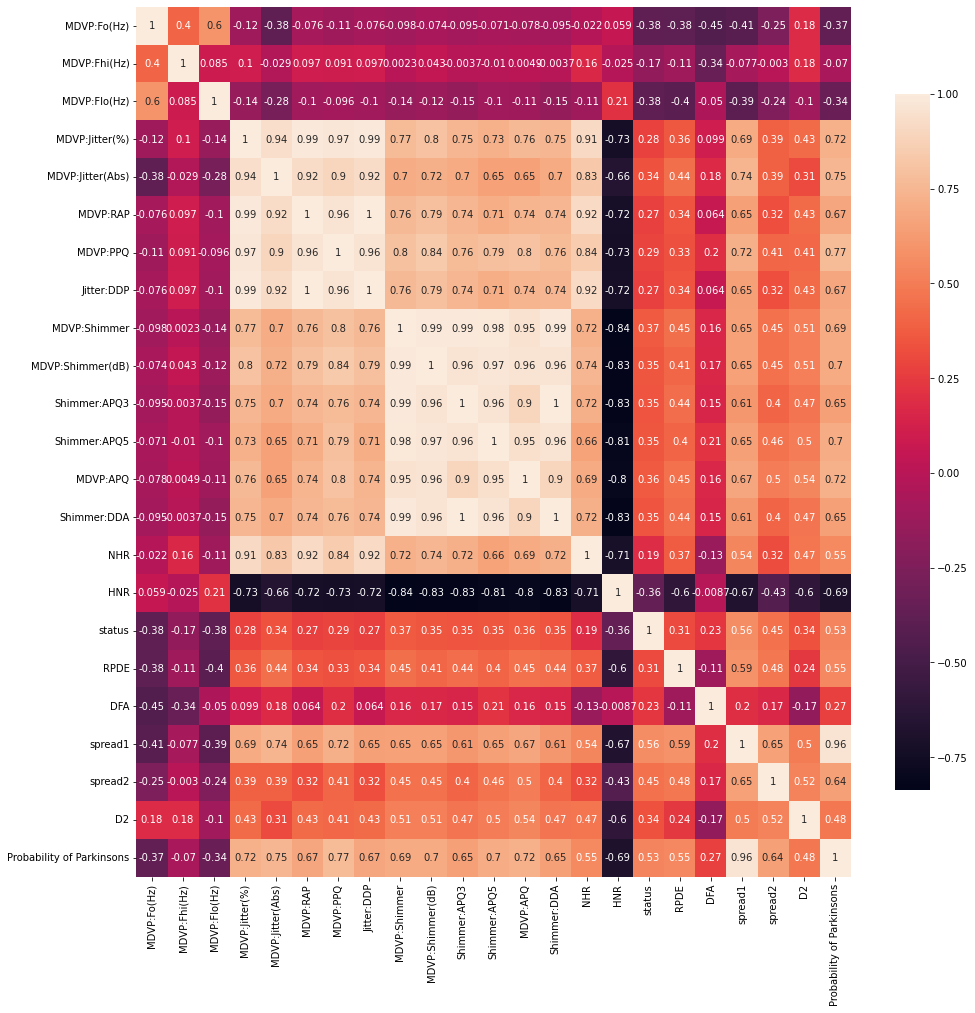

In [10]:
plt.subplots(figsize=(16,16))
sns.heatmap(dataset.corr(),annot= True,cbar_kws = {"shrink" : 0.80})

### Basic implementation of neural network trained using back-propagation

In [13]:
class NeuralNetwork:
    
    def __init__(self, layers, lr = 0.001, itera = 1000):
        """Initializes random weights and bias for a layer l

            Arguments
            ---------
            n_l_1: int
              Number of neurons in previous layer (l-1)
            n_l_1: int
              Number of neurons in current layer (l)
            Returns
            -------
            dict
              Contains the randomly initialized weights and bias arrays

              The keys for weights and bias arrays in the dict are 'w1', 'b1', 'w2' and 'b2'
        """
        self.X = None
        self.Y = None
        self.params = dict()
        self.loss = list()
        self.layers = layers
        self.iter = itera
        self.lr = lr
        
   

    def init_weights(self):

        np.random.seed(1)
        self.params['w1'] = np.random.randn(self.layers[0], self.layers[1])
        self.params['w2'] = np.random.randn(self.layers[1], self.layers[2])
        self.params['b1'] = np.random.randn(self.layers[1])
        self.params['b2'] = np.random.randn(self.layers[2])

    
    def forward_prop(self,a_f):
        """Performs forward propagation at each unit of each layer in my network and calculates output value
        """

        A1 = self.X.dot(self.params['w1'] + self.params['b1'])
        H1 = a_f(A1)
        A2 = A1.dot(self.params['w2']) + self.params['b2']

        self.params['Z1'], self.params['Z2'], self.params['A1'] = A1, A2, H1
        
        H2 = a_f(A2)
        loss_i = self.Loss(self.y, H2)

        return H2, loss_i

    def back_prop(self,H2,H2_d):
        """Performs forward propagation at each unit of each layer in my network and calculates output value
        """
        dloss_H2 = -(np.divide(self.y,H2) - np.divide((1 - self.y), (1 - H2)))
        afun = H2*(1-H2)
        A2d = dloss_H2*afun

        H1d = A2d.dot(self.params['w2'].T)
        dLoss_w2 = self.params['A1'].T.dot(A2d)
        dLoss_b2 = np.sum(A2d, axis= 0)

        A1_d = H1d * H2_d(self.params['Z1'])
        dLoss_w1 = self.X.T.dot(A1_d)
        dLoss_b1 = np.sum(A1_d, axis=0)

        """Within the back_prp function, after calculating all the derivatives we need for w1,b1,w2 and b2, we proceed in the
        final lines, re-update our weights and biases by subtracting the derivatives multiplied by the learning rate"""

        self.params['w1']=self.params['w1']-self.lr*dLoss_w1
        self.params['b1']=self.params['b1']-self.lr*dLoss_b1
        self.params['w2']=self.params['w2']-self.lr*dLoss_w2
        self.params['b2']=self.params['b2']-self.lr*dLoss_b2

    def Loss(self,y, H2):
        """Calculate the entropy loss

            Arguments
            --------- 
            y: array-like
              True lables
            H2: predicted values

            Returns
            -------
            loss: float
              Entropy loss
        """
        n = len(y)
        loss = -1/n * (np.sum(np.multiply(np.log(H2),y) + np.multiply((1 - y), np.log(1 - H2))))
        return loss 

    def training(self,X, y,a_f,dAct_fun):
        """Gradient descent implementation utilizing with back and forward propagation"""
        self.X = X
        self.y = y
        self.init_weights()

        for i in range(self.iter):
            H2, loss = self.forward_prop(a_f)
            self.loss.append(loss)
            self.back_prop(H2,dAct_fun)

        return H2
    
    def plottrain(self):
        """Plotting of the training curve, Entropy vs Iterations"""
        plt.plot(self.loss)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Training Curve")
        plt.show()
        
    def plottest(self):
        """Plotting of the testing curve, Entropy vs Iterations"""
        plt.plot(self.loss)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Testing Curve")
        plt.show()
        
        
    """ I used one of the simplest loss functions used in machine learning, MSE or mean square error."""
    def error(self, actual, predicted):
        squared_errors = (predicted - actual) ** 2
        error = np.sum(squared_errors)
        
        return  error

### Here i transform the features by scaling them to a given range(0-1).  

In [14]:
def norm(inputt):
        new_inputt = []
        threshold = .5 
        for i in inputt:
            if i < threshold:
                i = 0
                new_inputt.append(i)
            else:
                i = 1
                new_inputt.append(i)
        new_inputt = np.array(new_inputt)
        return new_inputt

### Defining activation functions and their derivatives functions
#### I have declared the Relu, linear, tanh and Sigmoid functions that will compute the non-linear activation functions at the output of each layer.

In [15]:
def linear(x, alpha=0.01):
    
    """Applies leaky relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value
    alpha: float
      Negative slope coefficient

    Returns
    -------
    A: same shape as input
       Value after applying linear function
    """   
    return np.where(x > 0, x, x*alpha)

In [16]:
def sigmoid(x):
    """Applies sigmoid function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying sigmoid function
    """    
    return 1/(1+np.power(np.e, -x))

In [17]:
def tanh(x):
    """Applies tanh function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying tanh function
    """   
    return np.tanh(x)

In [18]:
def ReLu(x):
    return np.maximum(0,x)

In [19]:
def linear_d(x, alpha=0.01):
    """Applies differentiation of linear function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value
    alpha: float
      Negative slope coefficient

    Returns
    -------
    A: same shape as input
      Value after applying diff of linearfunction
    """
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

In [20]:
def sigmoid_d(x):
    """Applies differentiation of sigmoid function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of sigmoid function
    """
    s = 1/(1+np.exp(-x))
    dx = s * (1-s)
    return dx

In [21]:
def tanh_d(x):
    """Applies differentiation of tanh function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of tanh function
    """
    return 1-(tanh(x)**2)

In [22]:
def relu_d(x):
    """Applies differentiation of relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of relu function
    """
    x[ x <= 0 ] = 0
    x[x > 0 ] = 1
    return x

### Exploring the effect of linear activation function and it's derivative, on 1 hidden layer and 2 hidden neurons.

Training.............................................
accuracy: 96.15384615384616%


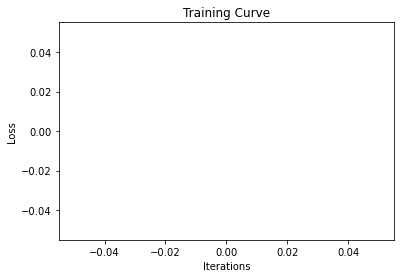

Testing.............................................
accuracy:100.0%


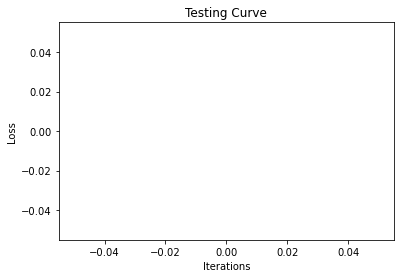

In [23]:
neural = NeuralNetwork([21, 2, 1])
Train_n = neural.training(X_train,Y_train,linear,linear_d)
Train_n = norm(Train_n)
print('Training.............................................')
print("accuracy: {}".format(accuracy_score(Y_train,Train_n) * 100) + '%')
neural.plottrain()

print('Testing.............................................')
Train_n = neural.training(X_test,Y_test,linear,linear_d)
Train_n = norm(Train_n)
print("accuracy:{}".format(accuracy_score(Y_test,Train_n)*100) +"%")
neural.plottest()

### Exploring the effect of Sigmoid activation function and it's derivative, on 1 hidden layer.

Training.............................................
accuracy: 99.35897435897436%


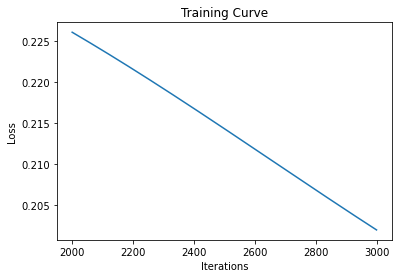

Testing.............................................
accuracy:100.0%


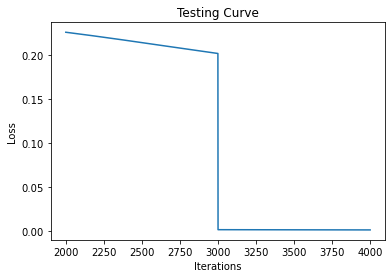

In [24]:
Train_n1 = neural.training(X_train,Y_train,sigmoid,sigmoid_d)
Train_n1 = norm(Train_n1)
print('Training.............................................')
print("accuracy: {}".format(accuracy_score(Y_train,Train_n1) * 100) + '%')
neural.plottrain()

print('Testing.............................................')
Train_n1 = neural.training(X_test,Y_test,sigmoid,sigmoid_d)
Train_n1 = norm(Train_n1)
print("accuracy:{}".format(accuracy_score(Y_test,Train_n1)*100) +"%")
neural.plottest()

### Exploring the effect of tanh activation function and it's derivative, on 1 hidden layer.

Training.............................................
accuracy: 70.51282051282051%


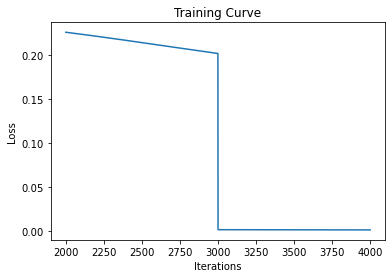

Testing.............................................
accuracy:66.66666666666666%


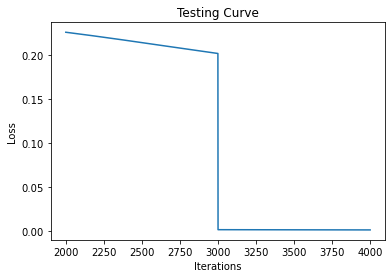

In [25]:
Train_n2 = neural.training(X_train,Y_train,tanh,tanh_d)
Train_n2 = norm(Train_n2)
print('Training.............................................')
print("accuracy: {}".format(accuracy_score(Y_train,Train_n2) * 100) + '%')
neural.plottrain()

print('Testing.............................................')
Train_n2 = neural.training(X_test,Y_test,tanh,tanh_d)
Train_n2 = norm(Train_n2)
print("accuracy:{}".format(accuracy_score(Y_test,Train_n2)*100) +"%")
neural.plottest()

### Exploring the effect of network size on generalizability
#### Testing on different number of hidden layers/neurons also using various activations i implemented above

1. Exploration comparison of different number of hidden layers and number of hidden neurons on sigmoid activation function

Testing on two Hidden layers with sigmoid activation function..........
accuracy: :100.0%


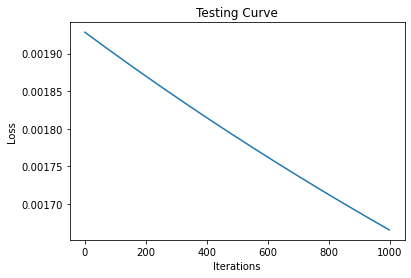

Testing on one Hidden layer and 5 hidden neurons with sigmoid activation function...........
accuracy: :100.0%


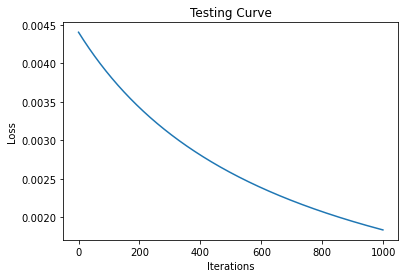

In [26]:
neural1 = NeuralNetwork([21, 2,1, 1])
print('Testing on two Hidden layers with sigmoid activation function..........')
Train_n3 = neural1.training(X_test,Y_test,sigmoid,sigmoid_d)
Train_n3 = norm(Train_n3)
print("accuracy: :{}".format(accuracy_score(Y_test,Train_n3)*100) +"%")
neural1.plottest()

neural2 = NeuralNetwork([21, 5, 1])
print('Testing on one Hidden layer and 5 hidden neurons with sigmoid activation function...........')
Train_n4 = neural2.training(X_test,Y_test,sigmoid,sigmoid_d)
Train_n4 = norm(Train_n4)
print("accuracy: :{}".format(accuracy_score(Y_test,Train_n4)*100) +"%")
neural2.plottest()

2. Exploration comparison of different number of hidden layers and number of hidden neurons on tanh activation function

Testing on two Hidden layers with tanh activation function..........
accuracy: :66.66666666666666%


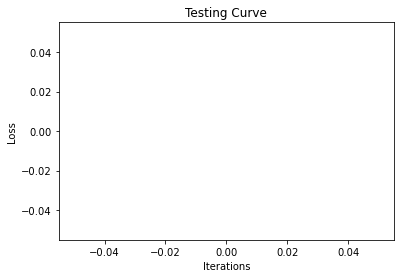

Testing on one Hidden layer with tanh activation function..........
accuracy: :97.43589743589743%


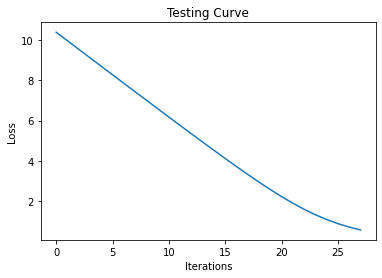

In [27]:
neural4 = NeuralNetwork([21, 2, 1, 1])
print('Testing on two Hidden layers with tanh activation function..........')
Train_n5 = neural4.training(X_test,Y_test,tanh,tanh_d)
Train_n5 = norm(Train_n5)
print("accuracy: :{}".format(accuracy_score(Y_test,Train_n5)*100) +"%")
neural4.plottest()

neural5 = NeuralNetwork([21, 1, 1])
print('Testing on one Hidden layer with tanh activation function..........')
Train_n6 = neural5.training(X_test,Y_test,tanh,tanh_d)
Train_n6 = norm(Train_n6)
print("accuracy: :{}".format(accuracy_score(Y_test,Train_n6)*100) +"%")
neural5.plottest()

3. Exploration comparison of different number of hidden neurons in one hidden layer on sigmoid activation function

Testing on 20 Hidden neurons on 1 hidden layer with sigmoid activation function..........
accuracy: :100.0%


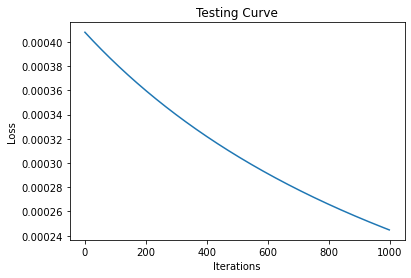

Testing on 30 Hidden neurons on 1 hidden layer with sigmoid activation function..........
accuracy: :100.0%


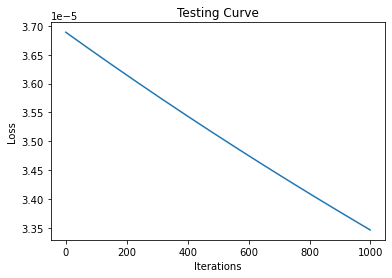

In [28]:
neural6 = NeuralNetwork([21, 20, 1])
print('Testing on 20 Hidden neurons on 1 hidden layer with sigmoid activation function..........')
Train_n7 = neural6.training(X_test,Y_test,sigmoid,sigmoid_d)
Train_n7 = norm(Train_n7)
print("accuracy: :{}".format(accuracy_score(Y_test,Train_n7)*100) +"%")
neural6.plottest()

neural6 = NeuralNetwork([21, 30, 1])
print('Testing on 30 Hidden neurons on 1 hidden layer with sigmoid activation function..........')
Train_n7 = neural6.training(X_test,Y_test,sigmoid,sigmoid_d)
Train_n7 = norm(Train_n7)
print("accuracy: :{}".format(accuracy_score(Y_test,Train_n7)*100) +"%")
neural6.plottest()